<a href="https://colab.research.google.com/github/ahcamachod/1878-analisis-y-clasificacion-de-rostros-vision-por-computador-con-opencv/blob/aula-3/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y Clasificación de Rostros: Visión por Computador con OpenCV

En este notebook estaremos desarrollando el código para trabajar con análisis facial utilizando Open Computer Vision.

Emplearemos algunas imágenes para realizar los ejercicios, y particularmente, tomaremos como referencia una base de imágenes de Georgia Tech (*http://www.anefian.com/research/gt_db.zip*).

La documentación referente a los principales paquetes que estaremos usando se relaciona a continuación:

* *https://docs.opencv.org/4.x/*
* *http://dlib.net/python/*
* *https://pillow.readthedocs.io/en/stable/*

## 1. Conociendo el problema

In [1]:
import cv2
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


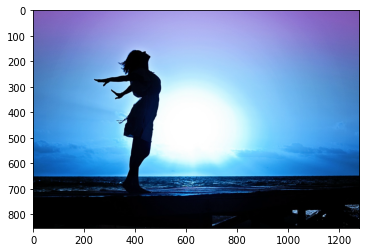

In [3]:
imagen = cv2.imread("/content/drive/MyDrive/imagenes/px-girl.jpg")
plt.imshow(imagen)

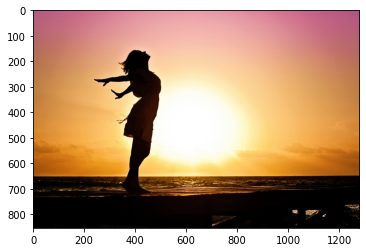

In [4]:
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb)

In [5]:
imagen_rgb.shape

(853, 1280, 3)

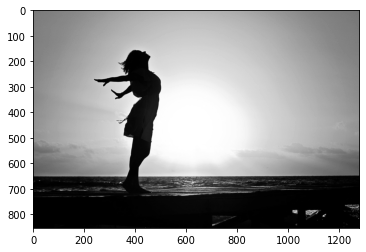

In [6]:
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(imagen_gris, cmap='gray')

In [7]:
imagen_gris.shape

(853, 1280)

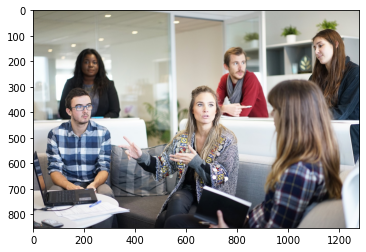

In [8]:
imagen = cv2.imread("/content/drive/MyDrive/imagenes/px-people.jpg")
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

In [9]:
imagen.shape

(853, 1280, 3)

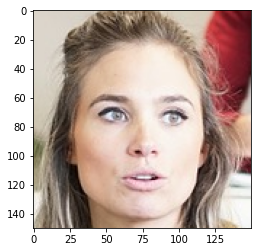

In [10]:
imagen_roi = imagen[300:450, 600:750]
plt.imshow(imagen_roi)

In [11]:
cv2.imwrite("/content/drive/MyDrive/imagenes/imagen_roi.png", imagen_roi)

True

In [12]:
imagen_roi = cv2.cvtColor(imagen_roi, cv2.COLOR_RGB2BGR)
cv2.imwrite("/content/drive/MyDrive/imagenes/imagen_roi.png", imagen_roi)

True

## 2. Segmentación de rostros

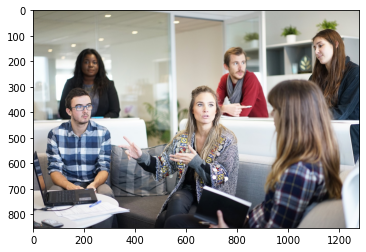

In [13]:
imagen = cv2.imread("/content/drive/MyDrive/imagenes/px-people.jpg")
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

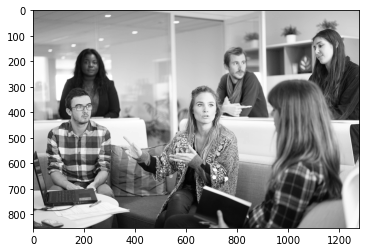

In [14]:
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
plt.imshow(imagen_gris, cmap="gray")

In [15]:
clasificador = cv2.CascadeClassifier("/content/drive/MyDrive/clasificadores/haarcascade_frontalface_default.xml")

In [16]:
rostros = clasificador.detectMultiScale(imagen_gris, 1.3, 5)

In [17]:
len(rostros)

5

In [18]:
rostros

array([[ 189,  176,   75,   75],
       [1088,  102,  101,  101],
       [ 767,  176,   84,   84],
       [ 619,  327,  114,  114],
       [ 150,  337,  102,  102]], dtype=int32)

In [19]:
imagen_anotada = imagen.copy()

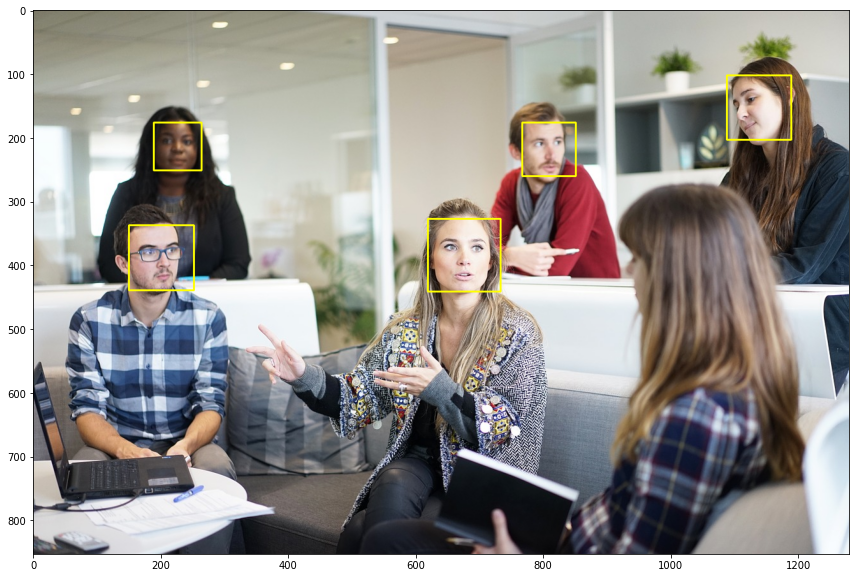

In [20]:
for (x, y, w, h) in rostros:
  cv2.rectangle(imagen_anotada, (x,y), (x+w, y+h), (255,255,0), 2)
plt.figure(figsize=(20,10))
plt.imshow(imagen_anotada)

In [21]:
rostros[1]

array([1088,  102,  101,  101], dtype=int32)

In [22]:
rostro_imagen = 0

for (x, y, w, h) in rostros:
  rostro_imagen += 1
  imagen_roi = imagen[y:y+h, x:x+w]
  imagen_roi = cv2.cvtColor(imagen_roi, cv2.COLOR_RGB2BGR)
  cv2.imwrite("/content/drive/MyDrive/imagenes/rostro_" + str(rostro_imagen) + ".png", imagen_roi)

## 3. Clasificación de rostros

## 4. Algoritmos de clasificación

## 5. Marcos faciales

## 6. Aplicaciones del análisis facial